In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mini_survey_results = pd.read_csv("mini_survey_results.csv")
mini_survey_results.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q1.2,Q1.3,Q1.4,Q3.1,Q4.1,Q7.2,Q7.3_1,Q7.3_2,Q7.3_4,Q7.3_5,Q7.3_6,Q16.2,Q16.3_1,Q16.3_2,Q16.3_3,Q16.3_4,Q16.3_5,Q16.3_10,Q32.2,Q32.3_1,Q32.3_2,Q32.3_4,...,Q82.2,Q82.3_9,Q82.3_10,Q82.3_12,Q82.3_13,Q82.3_18,Q91.2,Q91.3_9,Q91.3_10,Q91.3_12,Q91.3_13,Q91.3_18,Q107.2,Q107.3_9,Q107.3_10,Q107.3_12,Q107.3_13,Q107.3_18,Q116.2,Q116.3_9,Q116.3_10,Q116.3_12,Q116.3_13,Q116.3_18,Q132.2,Q132.3_17,Q132.3_18,Q132.3_20,Q132.3_21,Q132.3_26,Q141.2,Q141.3_17,Q141.3_18,Q141.3_20,Q141.3_21,Q141.3_26,Q157.2,Q158.2,Random ID,Fail ID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Q_RecaptchaScore,"If A is to B, then F is to ____.",Read the following sentence: “They went to the...,Read the following sentences: Which sentence i...,Read the following poem. Do all the last words...,Read the following poem. Do all the last words...,What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...","Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",...,What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",What is the theme of this poem?,Poem quality - On a scale from 1 (minimum) to ...,Poem quality - On a scale from 1 (incoherent) ...,"Poem quality - On a scale from 1 to 5, please ...",Poem quality - How many lines does this poem h...,"Poem quality - On a scale from 1 to 5, how lik...",Enter the code above,Enter the code above,Random ID,Fail ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""Imp

In [3]:
responses = mini_survey_results.loc[2:].reset_index(drop=True)
responses.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q1.2,Q1.3,Q1.4,Q3.1,Q4.1,Q7.2,Q7.3_1,Q7.3_2,Q7.3_4,Q7.3_5,Q7.3_6,Q16.2,Q16.3_1,Q16.3_2,Q16.3_3,Q16.3_4,Q16.3_5,Q16.3_10,Q32.2,Q32.3_1,Q32.3_2,Q32.3_4,...,Q82.2,Q82.3_9,Q82.3_10,Q82.3_12,Q82.3_13,Q82.3_18,Q91.2,Q91.3_9,Q91.3_10,Q91.3_12,Q91.3_13,Q91.3_18,Q107.2,Q107.3_9,Q107.3_10,Q107.3_12,Q107.3_13,Q107.3_18,Q116.2,Q116.3_9,Q116.3_10,Q116.3_12,Q116.3_13,Q116.3_18,Q132.2,Q132.3_17,Q132.3_18,Q132.3_20,Q132.3_21,Q132.3_26,Q141.2,Q141.3_17,Q141.3_18,Q141.3_20,Q141.3_21,Q141.3_26,Q157.2,Q158.2,Random ID,Fail ID
0,2022-01-01 10:06:03,2022-01-01 10:07:17,IP Address,170.39.186.70,100,74,True,2022-01-01 10:07:18,R_3ZTLHeuqYkkn2md,NaN,NaN,NaN,NaN,39.01800537109375,-77.53900146484375,anonymous,EN,1,G,Their,The men go to school every day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,67490,102
1,2022-01-01 10:05:51,2022-01-01 10:08:05,IP Address,170.39.186.160,100,134,True,2022-01-01 10:08:05,R_1DGVtt7cUI09pg9,NaN,NaN,NaN,NaN,39.01800537109375,-77.53900146484375,anonymous,EN,1,G,None of the above,The men goes to school every day.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,10148,66
2,2022-01-01 10:07:21,2022-01-01 10:10:40,IP Address,170.39.186.70,100,199,True,2022-01-01 10:10:40,R_2PnYpjufMabObmh,NaN,NaN,NaN,NaN,39.01800537109375,-77.53900146484375,anonymous,EN,1,G,None of the above,The men go to school every day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,72685,8
3,2022-01-01 10:01:31,2022-01-01 10:21:52,IP Address,66.118.4.0,100,1221,True,2022-01-01 10:21:52,R_2SqRNp1vGgAldiQ,NaN,NaN,NaN,NaN,42.75140380859375,-71.5785980224609375,anonymous,EN,1,G,Their,The men goes to school every day.,No,No,Darkness,3,2,4,4,3,Wisdom,3,4,3,4,4,4,Wisdom,3,4,3,...,Wisdom,3,4,3,4,4,Death,4,4,3,4,3,Forest,4,4,4,4,4,Love,4,3,4,4,3,Forest,3,4,3,4,4,Love,4,3,4,4,3,16529,NaN,16529,120
4,2022-01-01 10:08:27,2022-01-01 10:23:56,IP Address,107.77.218.138,100,929,True,2022-01-01 10:23:57,R_sZnMiLTjmuUvFoR,NaN,NaN,NaN,NaN,29.7754058837890625,-95.59799957275390625,anonymous,EN,0.699999988079071044921875,G,Their,The men goes to school every day.,No,Yes,Forest,5,4,1,4,5,Death,3,3,4,2,4,5,Other,2,3,4,...,Other,1,3,1,4,3,Death,2,3,2,4,5,Forest,3,3,1,4,5,Death,1,1,1,4,5,Other,2,3,3,4,3,Other,3,2,2,5,1,50847,NaN,50847,144


In [4]:
responses_sane = responses.loc[(responses['Q1.2'] == 'G') & (responses['Q1.3'] == 'Their') & (responses['Q1.4'] == 'The men goes to school every day.') & (responses['Q3.1'] == 'No') & (responses['Q4.1'] == 'Yes')].reset_index(drop=True)
responses_sane

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q1.2,Q1.3,Q1.4,Q3.1,Q4.1,Q7.2,Q7.3_1,Q7.3_2,Q7.3_4,Q7.3_5,Q7.3_6,Q16.2,Q16.3_1,Q16.3_2,Q16.3_3,Q16.3_4,Q16.3_5,Q16.3_10,Q32.2,Q32.3_1,Q32.3_2,Q32.3_4,...,Q82.2,Q82.3_9,Q82.3_10,Q82.3_12,Q82.3_13,Q82.3_18,Q91.2,Q91.3_9,Q91.3_10,Q91.3_12,Q91.3_13,Q91.3_18,Q107.2,Q107.3_9,Q107.3_10,Q107.3_12,Q107.3_13,Q107.3_18,Q116.2,Q116.3_9,Q116.3_10,Q116.3_12,Q116.3_13,Q116.3_18,Q132.2,Q132.3_17,Q132.3_18,Q132.3_20,Q132.3_21,Q132.3_26,Q141.2,Q141.3_17,Q141.3_18,Q141.3_20,Q141.3_21,Q141.3_26,Q157.2,Q158.2,Random ID,Fail ID
0,2022-01-01 10:08:27,2022-01-01 10:23:56,IP Address,107.77.218.138,100,929,True,2022-01-01 10:23:57,R_sZnMiLTjmuUvFoR,NaN,NaN,NaN,NaN,29.7754058837890625,-95.59799957275390625,anonymous,EN,0.699999988079071044921875,G,Their,The men goes to school every day.,No,Yes,Forest,5,4,1,4,5,Death,3,3,4,2,4,5,Other,2,3,4,...,Other,1,3,1,4,3,Death,2,3,2,4,5,Forest,3,3,1,4,5,Death,1,1,1,4,5,Other,2,3,3,4,3,Other,3,2,2,5,1,50847,NaN,50847,144
1,2022-01-01 10:13:46,2022-01-01 10:24:32,IP Address,192.180.12.203,100,645,True,2022-01-01 10:24:32,R_1owpFoHUNv3sSPE,NaN,NaN,NaN,NaN,41.12359619140625,-83.1819000244140625,anonymous,EN,1,G,Their,The men goes to school every day.,No,Yes,Forest,3,4,3,4,4,Other,3,3,4,3,4,3,Other,3,4,3,...,Other,4,3,3,4,2,Death,4,3,4,4,3,Forest,3,4,4,4,4,Other,4,3,3,4,2,Love,4,3,4,4,4,Other,4,3,4,4,3,51521,NaN,51521,123
2,2022-01-01 10:00:47,2022-01-01 10:43:22,IP Address,154.6.17.6,100,2555,True,2022-01-01 10:43:23,R_TaXHBGao79g1pyV,NaN,NaN,NaN,NaN,40.7487945556640625,-73.9882965087890625,anonymous,EN,0.89999997615814208984375,G,Their,The men goes to school every day.,No,Yes,Forest,4,4,4,4,4,Love,2,3,3,4,4,3,Wisdom,1,2,2,...,Love,3,3,4,4,4,Death,3,3,3,4,2,Forest,2,1,1,4,1,Death,4,3,4,4,4,Love,4,4,4,4,2,Wisdom,2,3,3,4,2,35981,NaN,35981,132
3,2022-01-01 11:00:02,2022-01-01 11:08:12,IP Address,206.54.198.154,100,489,True,2022-01-01 11:08:12,R_2E0tQEwtfLzktA6,NaN,NaN,NaN,NaN,29.5720062255859375,-95.54000091552734375,anonymous,EN,1,G,Their,The men goes to school every day.,No,Yes,Forest,4,4,3,4,5,Other,3,4,3,2,4,5,Other,2,2,2,...,Wisdom,5,2,3,4,2,Death,2,1,3,4,2,Forest,1,4,1,4,5,Other,2,3,2,4,4,Love,5,4,5,4,5,Love,3,2,4,4,5,21520,NaN,21520,18
4,2022-01-01 11:03:50,2022-01-01 11:16:11,IP Address,72.239.44.102,100,740,True,2022-01-01 11:16:11,R_XsT41gwXoq1n3fH,NaN,NaN,NaN,NaN,28.57269287109375,-80.8206024169921875,anonymous,EN,1,G,Their,The men goes to school every day.,No,Yes,Love,5,5,4,4,5,Love,4,5,4,3,4,2,Other,4,4,2,...,Wisdom,1,2,2,4,1,Death,4,5,5,4,3,Other,1,3,1,4,2,Other,1,1,1,4,1,Love,5,5,5,4,5,Love,1,3,3,4,1,43208,NaN,43208,25
5,2022-01-01 11:02:25,2022-01-01 11:20:06,IP Address,67.253.201.215,100,1061,True,2022-01-01 11:20:07,R_30osGlMwbigjTGG,NaN,NaN,NaN,NaN,43.21380615234375,-77.45749664306640625,anonymous,EN,1,G,Their,The men goes to school every day.,No,Yes,Other,4,4,2,4,4,Other,1,3,4,4,4,2,Other,3,1,1,...,Wisdom,2,3,1,4,1,Death,4,4,4,4,5,Forest,2,4,1,4,3,Darkness,1,5,2,4,3,Love,2,5,3,4,4,Love,4,5,4,4,3,35031,NaN,35031,58
6,2022-01-01 11:49:46,2022-01-01 11:58:54,IP Address,65.96.191.159,100,548,True,2022-01-01 11:58:54,R_3IYkY2dw5p40QpL,NaN,NaN,NaN,NaN,41.7599029541015625,-72.7574005126953125,anonymous,EN,1,G,Their,The men goes to school every day.,No,Yes,Other,5,4,2,4,4,Darkness,2,1,3,1,4,1,Other,4,3,3,...,Other,5,4,3,4,3,Death,4,4,4,4,3,Forest,1,2,1,4,1,Other,2,3,1,4,1,Wisdom,4,4,2,4,2,Love,4,4,5,4,4,31652,NaN,31652,161
7,2022-01-01 11:51:47,2022-01-01 12:04:12,IP Address,71.82.201.101,100,745,True,2022-01-01 12:04:12,R_VJY2MnI1zFqLR1n,NaN,NaN,NaN,NaN,45.01300048828125,-84.67189788818359375,anonymous,EN,0.89999997615814208984375,G,Their,The men goes to school every day.,No,Yes,Forest,3,4,4,4,4,Wisdom,3,4,3,3,4,4,Wisdom,3,4,3,...,Darkness,3,4,4,3,4,Love,4,3,

10 good answers (dropped Fail ID == 177 because they selected one incorrect choice for sanity Q1.4)

In [5]:
qs = [c for c in responses_sane.columns if "Q" in c]

In [6]:
poetic_cols = [c for c in qs if c[-3:] == '3_1' or c[-3:] == '3_9' or c[-4:] == '3_17']
poetic_cols

['Q7.3_1',
 'Q16.3_1',
 'Q32.3_1',
 'Q41.3_1',
 'Q57.3_9',
 'Q66.3_9',
 'Q82.3_9',
 'Q91.3_9',
 'Q107.3_9',
 'Q116.3_9',
 'Q132.3_17',
 'Q141.3_17']

In [7]:
humanlike_cols = ['Q7.3_6','Q16.3_10','Q32.3_10','Q41.3_10','Q57.3_18','Q66.3_18','Q82.3_18','Q91.3_18','Q107.3_18','Q116.3_18','Q132.3_26','Q141.3_26']
humanlike_cols

['Q7.3_6',
 'Q16.3_10',
 'Q32.3_10',
 'Q41.3_10',
 'Q57.3_18',
 'Q66.3_18',
 'Q82.3_18',
 'Q91.3_18',
 'Q107.3_18',
 'Q116.3_18',
 'Q132.3_26',
 'Q141.3_26']

In [8]:
grammatical_cols = ['Q7.3_2','Q16.3_2','Q32.3_2','Q41.3_2','Q57.3_10','Q66.3_10','Q82.3_10','Q91.3_10','Q107.3_10','Q116.3_10','Q132.3_18','Q141.3_18']
grammatical_cols

['Q7.3_2',
 'Q16.3_2',
 'Q32.3_2',
 'Q41.3_2',
 'Q57.3_10',
 'Q66.3_10',
 'Q82.3_10',
 'Q91.3_10',
 'Q107.3_10',
 'Q116.3_10',
 'Q132.3_18',
 'Q141.3_18']

In [9]:
authors = ['hafez', 'deepspeare', 'peter', 'bill', 'sylvia', 'human']

In [10]:
poetic_scores = {}
for i, col in enumerate(poetic_cols):
    j = i // 2
    if authors[j] not in poetic_scores:
        poetic_scores[authors[j]] = []
    vals = list(responses_sane[col].astype('int'))
    poetic_scores[authors[j]] += vals

In [11]:
humanlike_scores = {}
for i, col in enumerate(humanlike_cols):
    j = i // 2
    if authors[j] not in humanlike_scores:
        humanlike_scores[authors[j]] = []
    vals = list(responses_sane[col].astype('int'))
    humanlike_scores[authors[j]] += vals

In [12]:
grammatical_scores = {}
for i, col in enumerate(grammatical_cols):
    j = i // 2
    if authors[j] not in grammatical_scores:
        grammatical_scores[authors[j]] = []
    vals = list(responses_sane[col].astype('int'))
    grammatical_scores[authors[j]] += vals

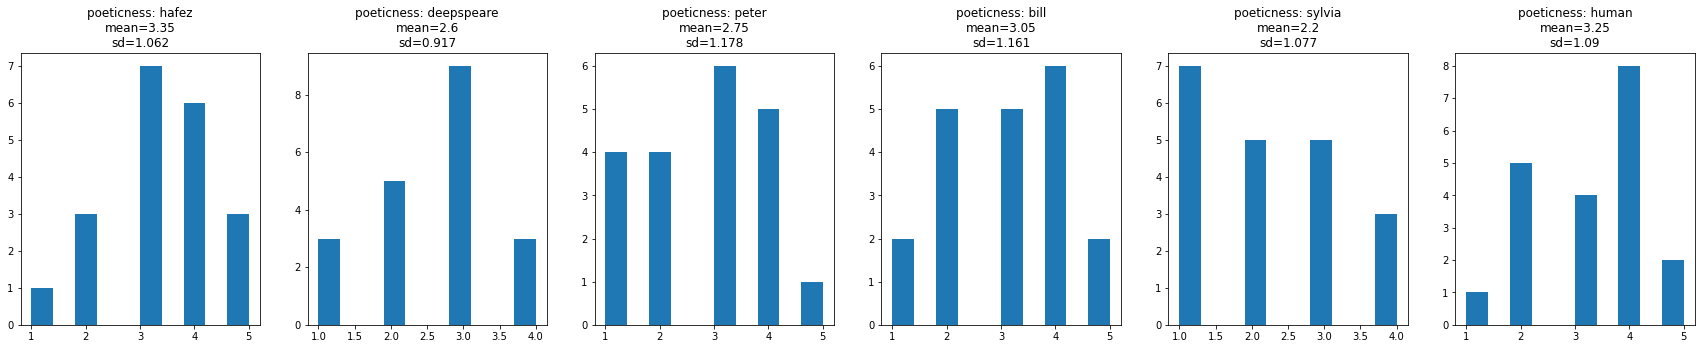

In [13]:
fig, axs = plt.subplots(1, len(authors), figsize=(5*len(authors), 5))

for i, aut in enumerate(authors):
    axs[i].hist(poetic_scores[aut])
    m = np.mean(poetic_scores[aut])
    sd = np.std(poetic_scores[aut])
    axs[i].set_title("poeticness: " + aut + "\nmean=" + str(np.round(m, 3)) + "\nsd=" + str(np.round(sd, 3)))

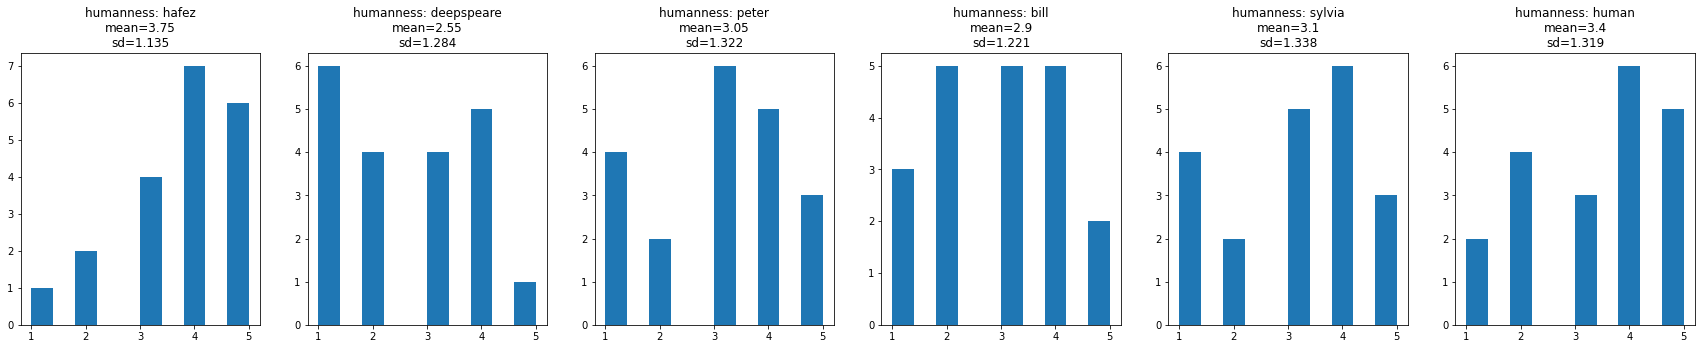

In [14]:
fig, axs = plt.subplots(1, len(authors), figsize=(5*len(authors), 5))

for i, aut in enumerate(authors):
    axs[i].hist(humanlike_scores[aut])
    m = np.mean(humanlike_scores[aut])
    sd = np.std(humanlike_scores[aut])
    axs[i].set_title("humanness: " + aut + "\nmean=" + str(np.round(m, 3)) + "\nsd=" + str(np.round(sd, 3)))

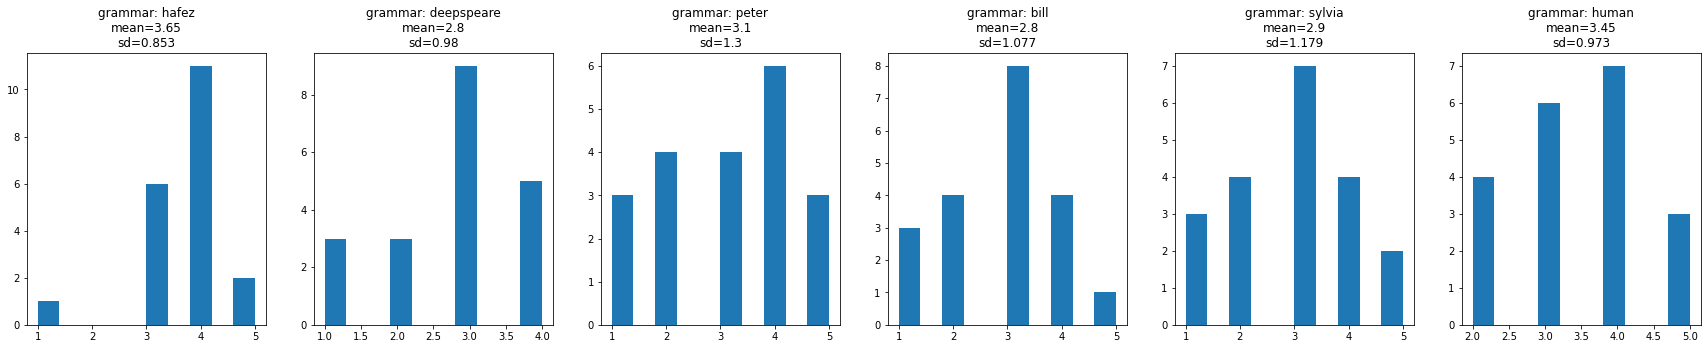

In [15]:
fig, axs = plt.subplots(1, len(authors), figsize=(5*len(authors), 5))

for i, aut in enumerate(authors):
    axs[i].hist(grammatical_scores[aut])
    m = np.mean(grammatical_scores[aut])
    sd = np.std(grammatical_scores[aut])
    axs[i].set_title("grammar: " + aut + "\nmean=" + str(np.round(m, 3)) + "\nsd=" + str(np.round(sd, 3)))